In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts
import scipy.stats as sp
df = pd.read_csv('House_Prediction_Data.csv')

In [48]:
# Dropping columns that have a large num of NaN values and also low significance in determining sale price
df.drop(df.columns[[0,3,6,57,72,73,74]], axis=1, inplace=True)

In [49]:
# Changing some categorical elements into ordered integers
df = df.replace({'KitchenQual':{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
                 'ExterQual':{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}})

In [50]:
# Converting categorical data to numerical
for col_name in df:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [51]:
clean_data = df.dropna()
clean_data.describe()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,...,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,56.072210,3.024070,10686.740336,0.996353,1.915390,2.787746,0.000729,3.005106,0.061999,12.362509,...,21.016047,3.630926,16.038658,2.938001,43.139314,6.330416,2007.811816,7.502553,3.802334,185181.890591
std,41.063631,0.618572,10224.805648,0.060302,1.415809,0.688399,0.027007,1.628883,0.275164,6.031719,...,60.500067,30.241332,57.403495,41.455453,503.065627,2.692423,1.331112,1.581079,1.055895,78872.352654
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,20.000000,3.000000,7734.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,133950.000000
50%,50.000000,3.000000,9591.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,167000.000000
75%,70.000000,3.000000,11708.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,217750.000000
max,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,24.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [52]:
# Removing outliers (anything farther than three standard deviations away fro mthe mean) present in each column
for col in clean_data.columns[1:]:
    q_mean = sts.mean(clean_data[col])
    q_sd = sts.stdev(clean_data[col])
    q_low = q_mean - (q_sd*3)
    q_hi = q_mean + (q_sd*3)    
    df_filtered = clean_data[(clean_data[col] < q_hi) & (clean_data[col] > q_low)]

df_filtered.sort_values(by="SalePrice")

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
916,20,0,9000,1,3,3,0,4,0,9,...,0,0,0,0,0,10,2006,8,0,35311.0
30,70,0,8500,1,3,3,0,4,0,9,...,172,0,0,0,0,7,2008,8,4,40000.0
812,20,0,8712,0,3,0,0,4,1,9,...,0,0,0,0,54,6,2010,8,2,55993.0
1380,30,3,8212,1,3,3,0,4,0,7,...,96,0,0,0,0,6,2010,8,4,58500.0
1100,30,3,8400,1,3,0,0,4,0,18,...,0,0,0,0,0,1,2009,8,4,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20,3,12220,1,3,3,0,4,0,16,...,0,0,0,0,0,9,2009,6,5,402861.0
231,60,3,15138,1,0,3,0,4,0,15,...,202,0,0,0,0,7,2009,8,4,403000.0
1353,50,3,14720,1,0,3,0,1,0,15,...,0,0,0,0,0,3,2010,8,4,410000.0
161,60,3,13688,1,0,3,0,4,0,16,...,0,0,0,0,0,3,2008,8,4,412500.0


In [53]:
# Create dictionary of correlation coefficients (r-value) of attributes on sale price, using linear regression
correl_dict = dict()
for column in df_filtered.columns[:-1]:
    correl_dict[column] = sp.linregress(df_filtered[column], df_filtered['SalePrice']).rvalue
correl_df = pd.DataFrame.from_dict(correl_dict, orient='index', columns=['Correl coef'])

In [54]:
# Select only attributes with significant correlation, using .6 as the threshold
signif_correl_df = correl_df[(correl_df['Correl coef'] >= .6) | (correl_df['Correl coef'] <= -.6)]
print(signif_correl_df)
df_filtered = df_filtered[['OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea', 'SalePrice']]

             Correl coef
OverallQual     0.791999
ExterQual       0.667351
GrLivArea       0.667800
KitchenQual     0.649143
GarageCars      0.638952
GarageArea      0.601276


(array([ 1.,  3.,  0.,  0.,  1.,  3.,  5.,  8.,  7.,  8., 10.,  7.,  3.,
         1.,  3.,  2.,  5.,  3.,  2.,  1.]),
 array([-0.53520886, -0.46884847, -0.40248808, -0.33612769, -0.2697673 ,
        -0.2034069 , -0.13704651, -0.07068612, -0.00432573,  0.06203467,
         0.12839506,  0.19475545,  0.26111584,  0.32747623,  0.39383663,
         0.46019702,  0.52655741,  0.5929178 ,  0.65927819,  0.72563859,
         0.79199898]),
 <BarContainer object of 20 artists>)

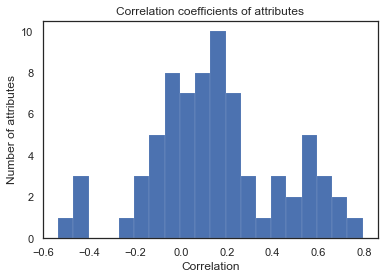

In [55]:
# Plot correlation coefficients of all attributes
plt.xlabel('Correlation')
plt.ylabel('Number of attributes')
plt.title('Correlation coefficients of attributes')

plt.hist(correl_df['Correl coef'], bins=20, linewidth=.1, edgecolor="white")

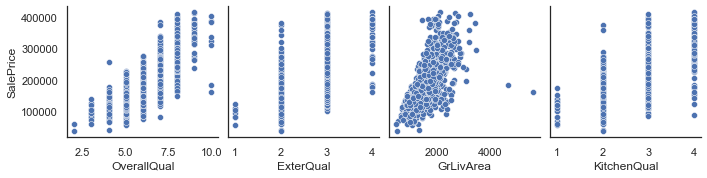

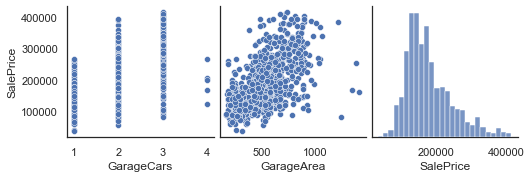

In [56]:
# Scatter plots of sale price and most corelated attributes
for i in range(0, len(df_filtered.columns), 4):
    sns.pairplot(data=df_filtered,
                x_vars=df_filtered.columns[i:i+4],
                y_vars=['SalePrice'])

In [57]:
from scipy import stats
z = np.abs(stats.zscore(df_filtered['SalePrice']))
print(z)

0       0.426773
1       0.021737
2       0.651793
3       0.600819
4       1.049329
          ...   
1455    0.075772
1456    0.449275
1457    1.296851
1458    0.568941
1459    0.488309
Name: SalePrice, Length: 1350, dtype: float64


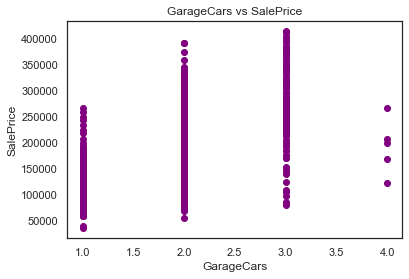

In [58]:
# Larger scatter plots
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('GarageCars vs SalePrice')
plt.scatter(df_filtered.GarageCars,df_filtered.SalePrice,color='purple')

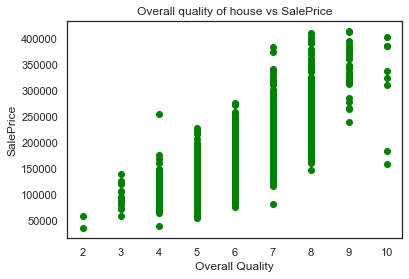

In [59]:
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.title('Overall quality of house vs SalePrice')
plt.scatter(df_filtered.OverallQual,df_filtered.SalePrice,color ='green')

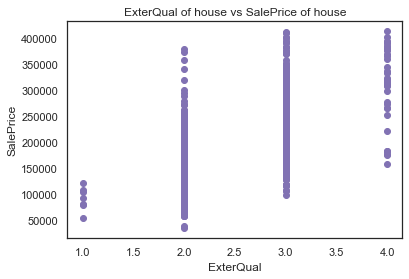

In [60]:
plt.xlabel('ExterQual')
plt.ylabel('SalePrice')
plt.title('ExterQual of house vs SalePrice of house')
plt.scatter(df_filtered.ExterQual,df_filtered.SalePrice,color ='m')
# Garrage having fours cars have does not have any effect on price of house

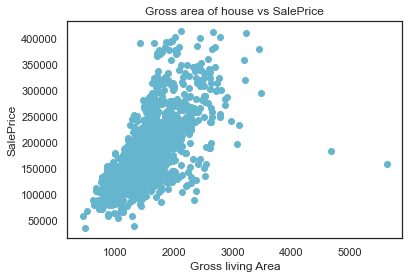

In [61]:
plt.xlabel('Gross living Area')
plt.ylabel('SalePrice')
plt.title('Gross area of house vs SalePrice')
plt.scatter(df_filtered.GrLivArea,df_filtered.SalePrice,color = 'c')

In [62]:
X=df_filtered.drop(['SalePrice'],axis=1)
y=df_filtered['SalePrice']
X.head()

,OverallQual,ExterQual,GrLivArea,KitchenQual,GarageCars,GarageArea
0,7,3,1710,3.0,2.0,548.0
1,6,2,1262,2.0,2.0,460.0
2,7,3,1786,3.0,2.0,608.0
3,7,2,1717,3.0,3.0,642.0
4,8,3,2198,3.0,3.0,836.0


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

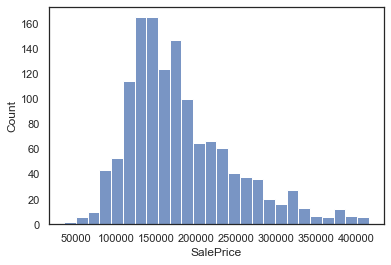

In [63]:
sns.histplot(data=y,color ='b')

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1350 non-null   int64  
 1   ExterQual    1350 non-null   int64  
 2   GrLivArea    1350 non-null   int64  
 3   KitchenQual  1350 non-null   float64
 4   GarageCars   1350 non-null   float64
 5   GarageArea   1350 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 73.8 KB


In [65]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [66]:
# Dividing data set to training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.30,random_state=10)
X_train.shape,X_test.shape

((945, 6), (405, 6))

In [67]:
# Data scaling and normalization
# some value is very large and other is small, this process helps to get uniform value

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test=sc.transform(X_test)

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV

In [69]:
# 1.Using Linear Regression
#
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
# Accuracy of model for test dataset
lr = lm.score(X_test,y_test)
lr


0.8008228675994822

In [71]:
# Evaluating Error using RMSE
rmlm = metrics.mean_squared_error(y_test,lm.predict(X_test))
rmlm

891144622.7709823

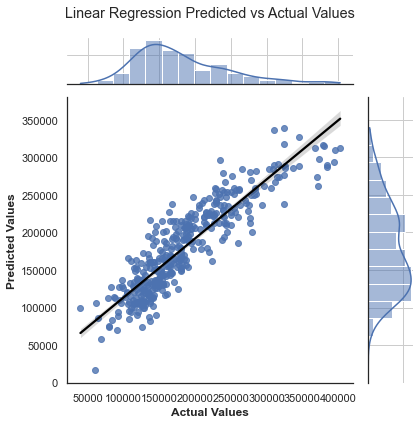

In [72]:
# Visualizing predicted y against provided y
predicted_y = lm.predict(X_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}})
g.fig.suptitle("Linear Regression Predicted vs Actual Values")
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

In [73]:
# 2.Using Gradient Boosting
# fit the data using train dataset
from sklearn.ensemble import IsolationForest,GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [74]:
# Accuracy of model for train dataset
model.score(X_train,y_train)

0.8750089583386382

In [75]:
# Accuracy of model for test dataset
gb = model.score(X_test,y_test)
gb

0.8131867169329207

In [76]:
# Evaluating Error using RMSE
rmgb = metrics.mean_squared_error(y_test,model.predict(X_test))
rmgb


835827138.6930981

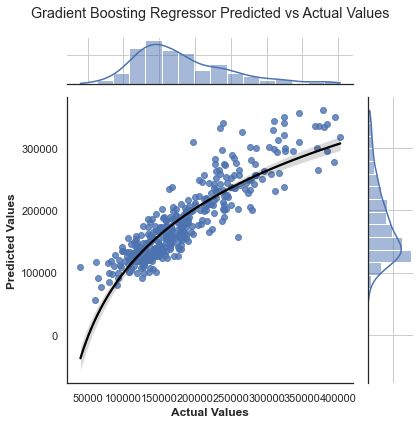

In [77]:
# Visualizing predicted y against provided y
predicted_y = model.predict(X_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}},logx=True)
g.fig.suptitle("Gradient Boosting Regressor Predicted vs Actual Values")
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

In [78]:

# 3.Using Random Forest
# fit the data using dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 50)
regressor.fit(X_train,y_train)  

RandomForestRegressor(random_state=50)

In [79]:
regressor.score(X_train,y_train)

0.9685396442801033

In [80]:
# Accuracy of model for test dataset
rf = regressor.score(X_test,y_test)
rf


0.8146058196390943

In [81]:
# Evaluating Error using RMSE
rmrf = metrics.mean_squared_error(y_test,regressor.predict(X_test))
rmrf


829477886.9967568

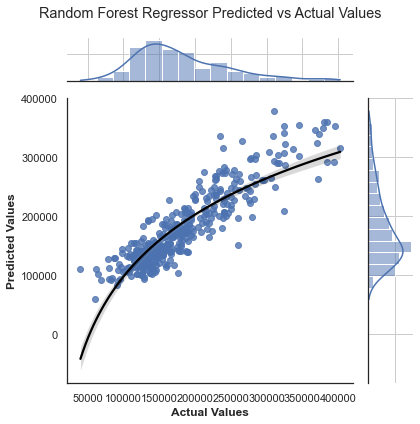

In [82]:
predicted_y = regressor.predict(X_test)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=y_test, y=predicted_y,kind='reg',
                  joint_kws={'line_kws':{'color':'black'}},logx=True)
g.fig.suptitle("Random Forest Regressor Predicted vs Actual Values")
g.ax_joint.set_xlabel('Actual Values', fontweight='bold')
g.ax_joint.set_ylabel('Predicted Values', fontweight='bold')
g.ax_marg_y.grid('on') 
g.ax_marg_x.grid('on') 
plt.tight_layout()

In [83]:
# Comparing results of different regressors
Results=  { 'Regressors': ['Linear Regression',  'GradientBoosting','RandomForest'],
            'RMSE' : [rmlm,rmgb,rmrf],
             'Accuracy' : [lr,gb,rf],
          }

C:\Users\dhoog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


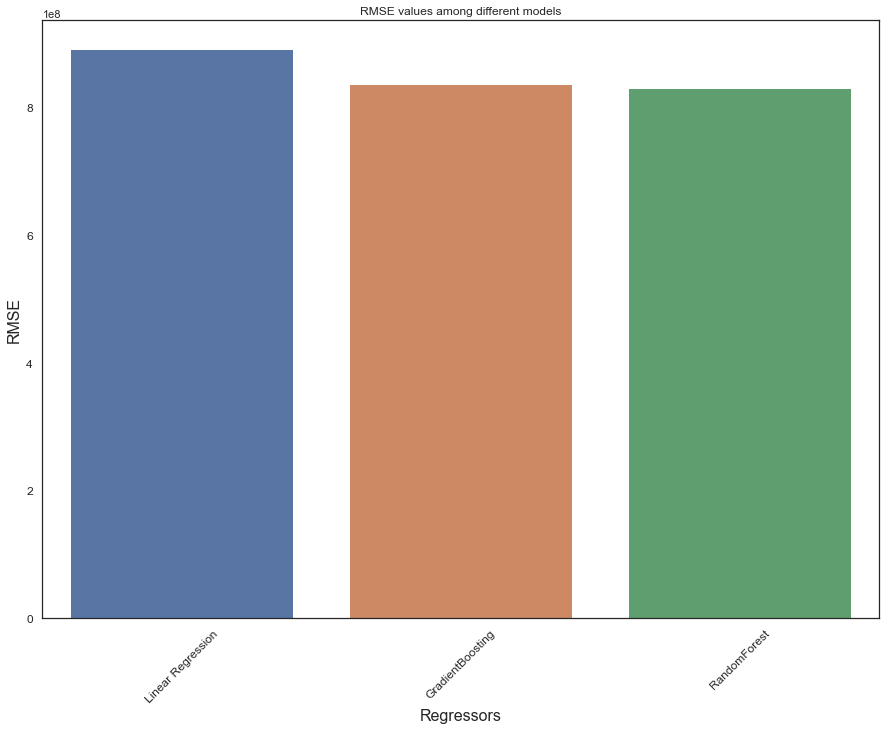

In [84]:
# Error comparison using bar plot
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['RMSE'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.title("RMSE values among different models")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\dhoog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


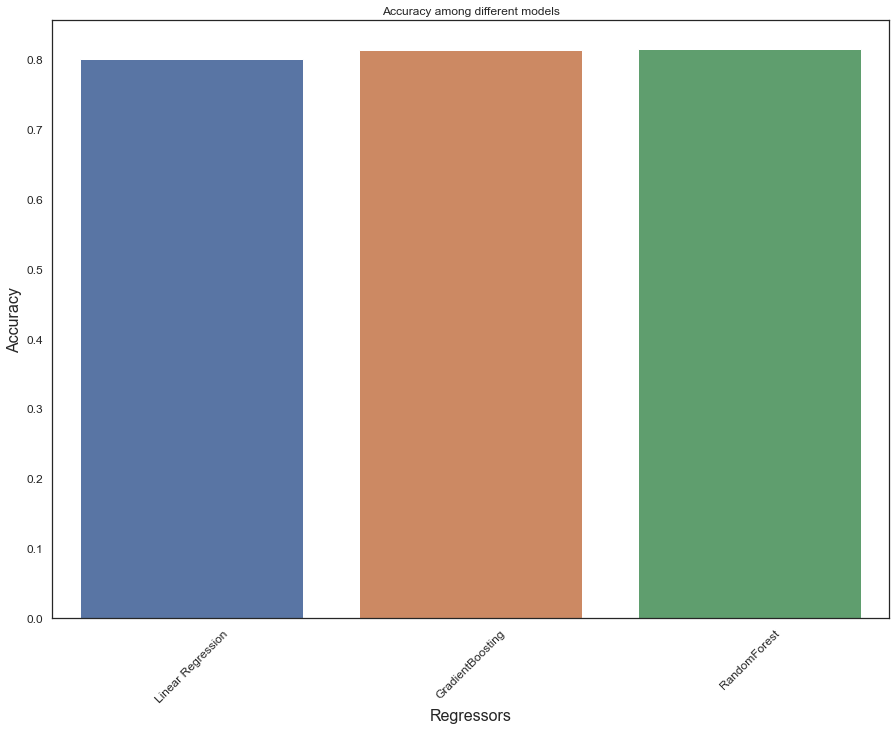

In [38]:
# Accuracy comparision using bar plot
plt.figure(figsize=(15, 11))
sns.barplot(Results['Regressors'], Results['Accuracy'])
plt.title('Accuracy among different models')
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()